In [65]:
from pyDAW import DataLoading
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [66]:
data, df, open_ch = DataLoading(["/mnt/data/wxy/VUV4/Amplifier/amplifier_raw_b0_seg0.bin"])


Recalculated and saved DataFrame to /mnt/data/wxy/VUV4/Amplifier/amplifier_df.csv
collection time:  0.0009090221988888889
Open Channel: [8 9]


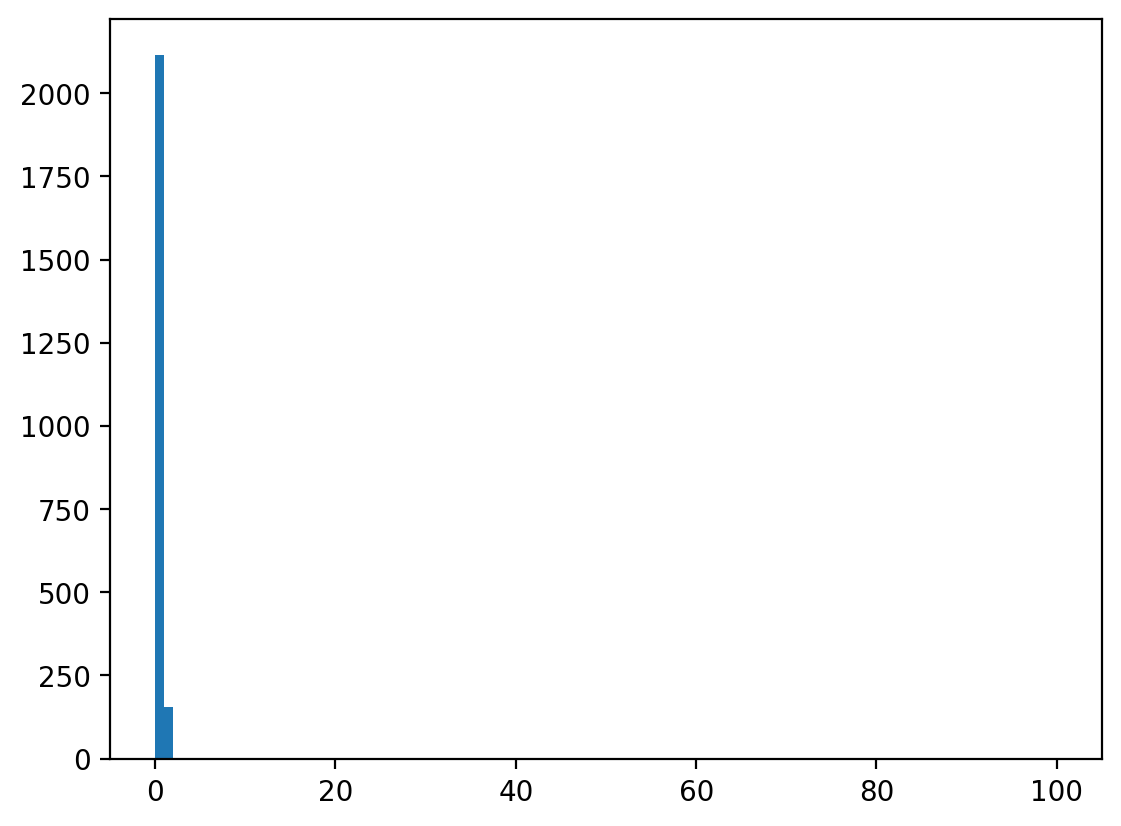

In [67]:
time_diff=np.diff(df["time"].to_numpy())
plt.hist(time_diff,np.linspace(0,100,100))
plt.show()

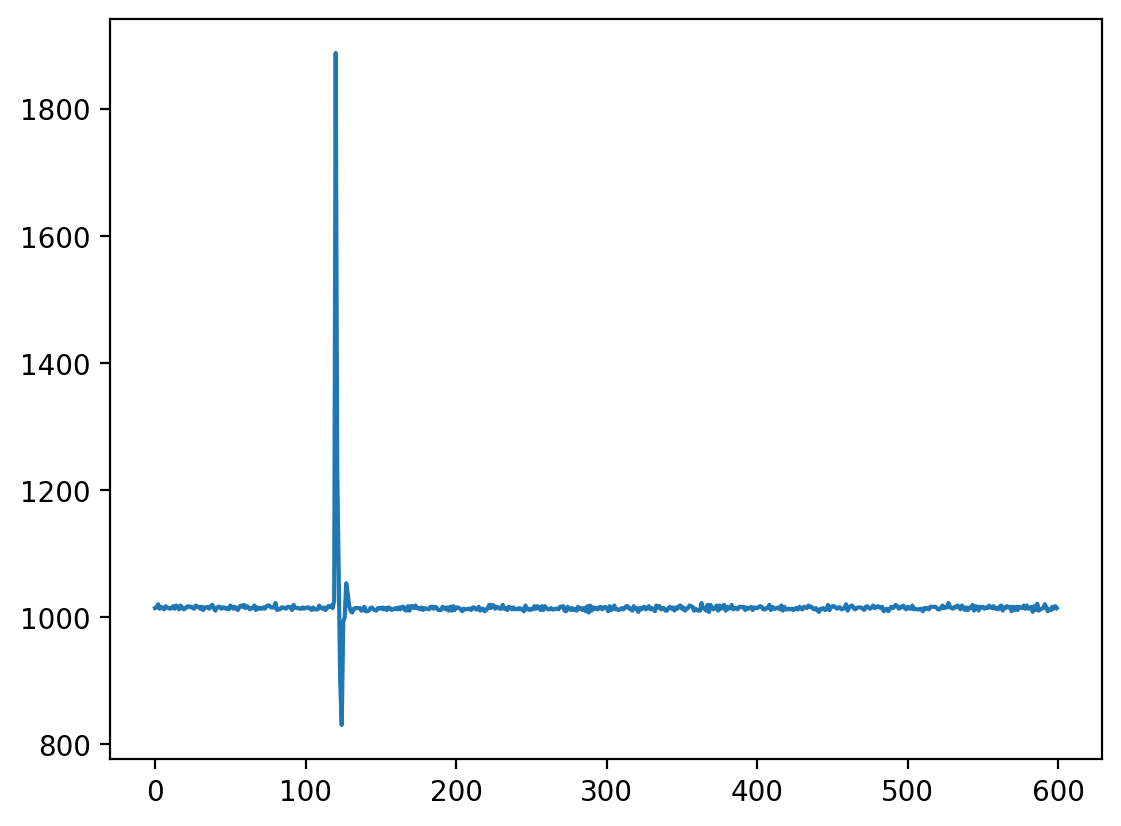

In [69]:
plt.plot(data[1].waveform)

In [70]:
df

,channel,baseline,peak,c_peak,charge,time,idx,event
0,8,888,550,338,-11125,49781,0,0
1,9,1014,830,184,-845,49780,1,0
2,9,1015,837,178,-1060,112279,2,1
3,8,893,425,468,-9282,112280,3,1
4,9,1016,800,216,-689,174779,4,2
...,...,...,...,...,...,...,...,...
26278,8,896,418,478,-8418,818044762,26278,13139
26279,8,888,549,339,-8113,818107262,26279,13139
26280,9,1015,819,196,-876,818107261,26280,13140
26281,8,893,411,482,-6999,818169762,26281,13140


In [83]:
df["peak2"]=[np.max(data[i].waveform)-data[i].baseline for i in range(len(data))]

In [79]:
df["charge"] = [np.sum(data[i].waveform[110:130]) for i in range(len(data))]

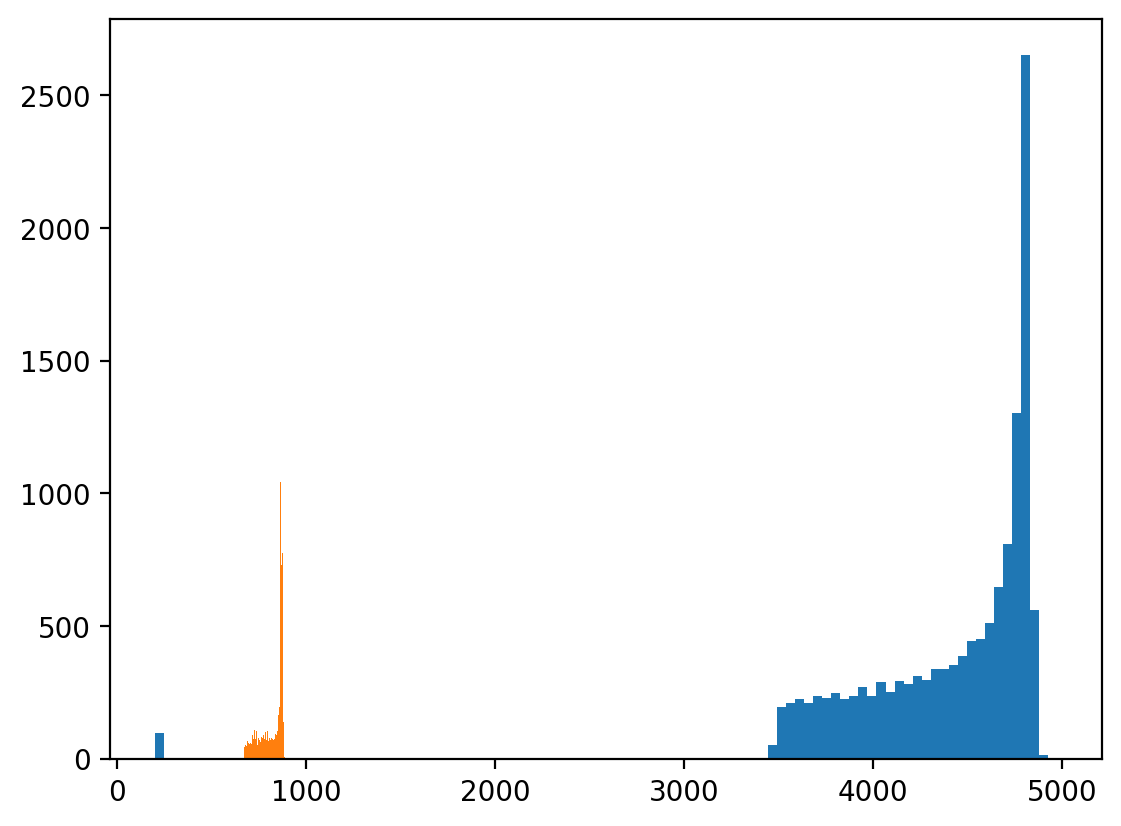

In [84]:
plt.hist(get_channel(df, 8)["peak2"], bins=100)
plt.hist(get_channel(df, 9)["peak2"], bins=100)
plt.show()

In [57]:
a=np.array([np.max(data[i].waveform) for i in range(1000)])
x``


In [58]:
from pyDAW import get_channel




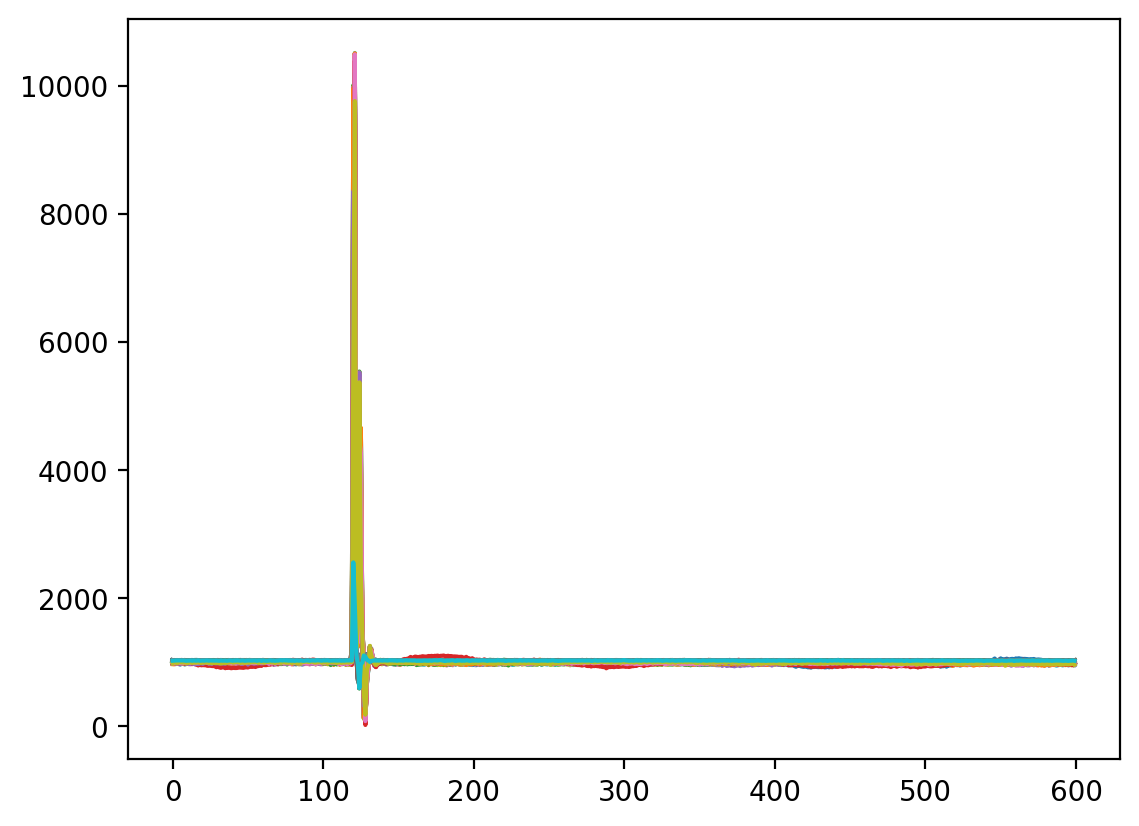

In [59]:
for i in range(100):
    plt.plot(data[i].waveform)

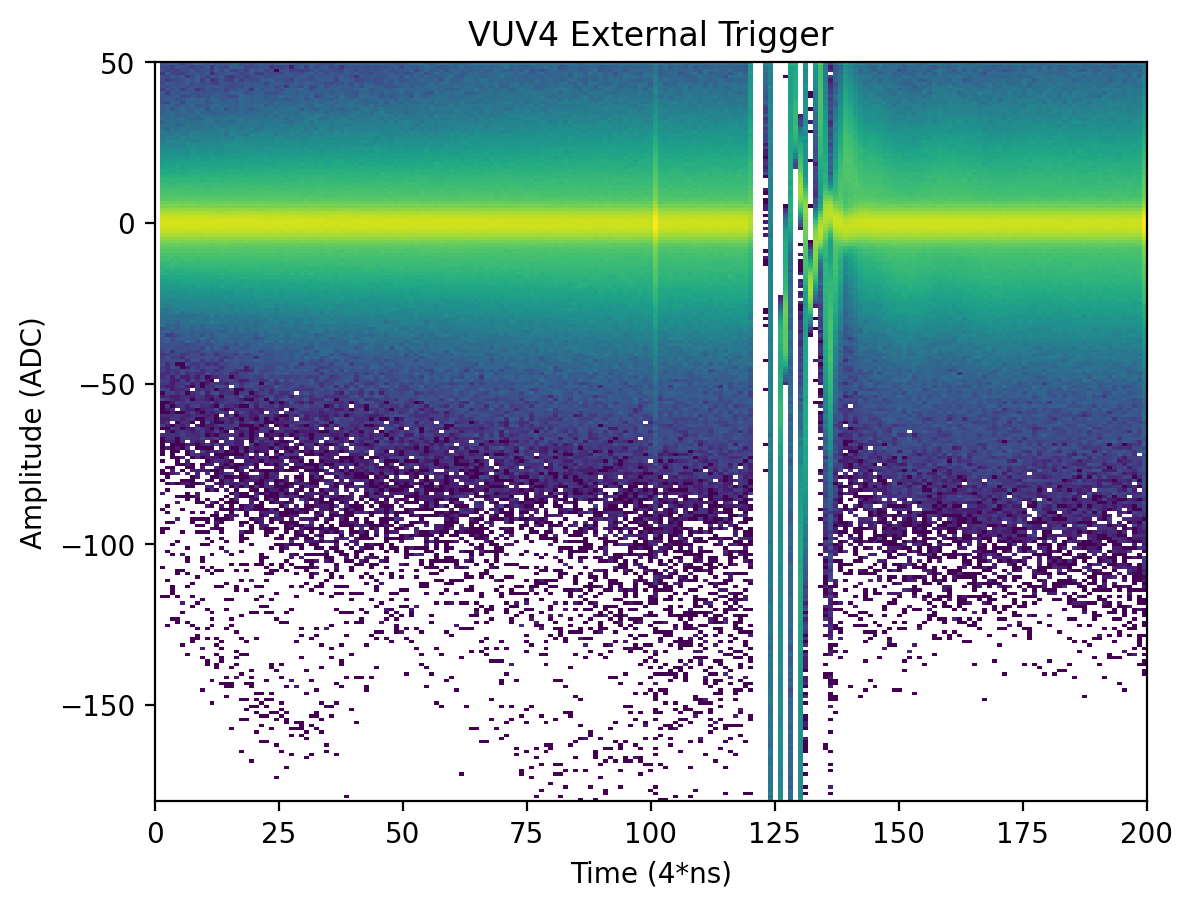

In [60]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

num = len(data)
a = []
for i in range(num):
    a.append(np.linspace(2, 200, 200))

a = np.array(a)  # 确保 a 是 NumPy 数组
b = np.array([data[i][0:200] - data[i].baseline for i in range(num)])  # 确保 b 也是 NumPy 数组

# 将 a 和 b 展平为一维数组
a = a.ravel()
b = b.ravel()

# 确保 a 和 b 的长度匹配
if len(a) != len(b):
    raise ValueError("a 和 b 的长度不匹配")

plt.hist2d(a, b, bins=[np.linspace(0, 200, 200), np.linspace(-180, 50, 230)], norm=LogNorm())

plt.title('VUV4 External Trigger')
plt.xlabel('Time (4*ns)')
plt.ylabel('Amplitude (ADC)')

plt.show()

In [61]:
min = []


for i in range(len(data)):
    min.append(np.min(data[i].waveform[75:175]))

/tmp/ipykernel_1001976/4076976679.py:2: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


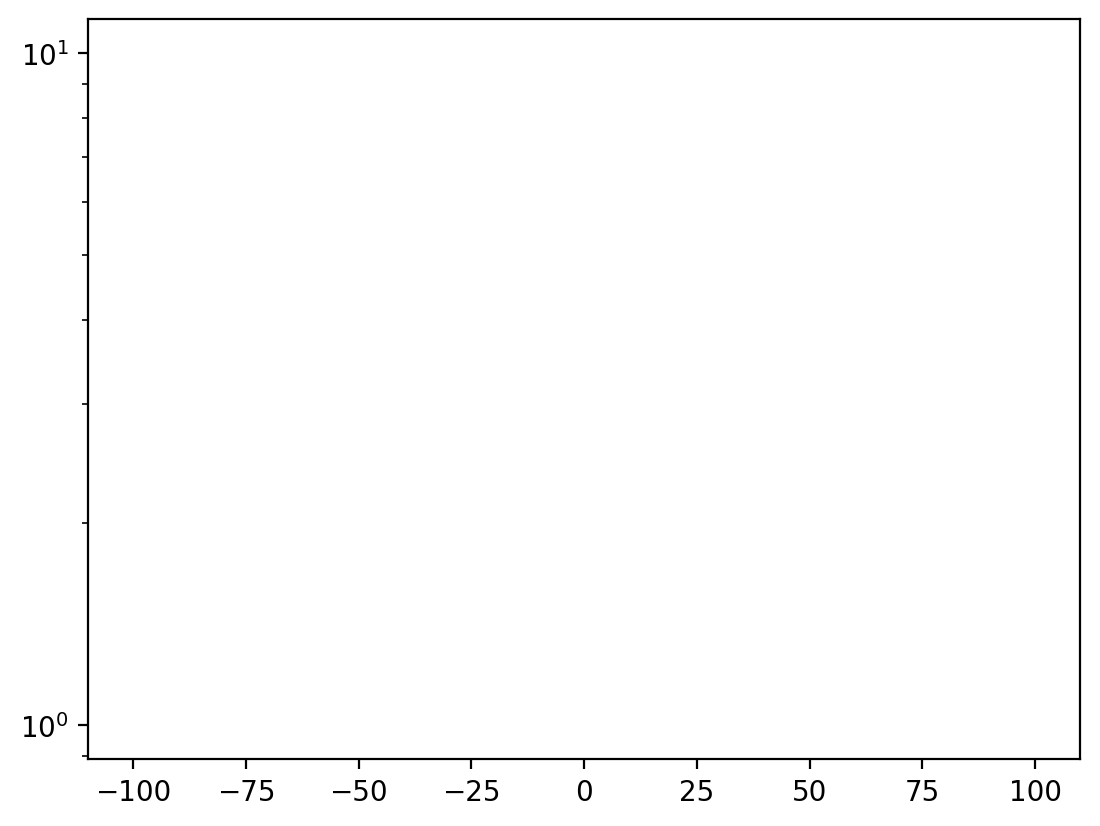

In [62]:
plt.hist(8125-np.array(min), bins=np.linspace(-100, 100, 100))
plt.yscale("log")